<a href="https://colab.research.google.com/github/Shivani-Khare/Hands-on-ML-Basic-to-Advance-/blob/master/Analysis_of_PMSM_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date Created**: 25 August , 2021

**Topic**: EDA on PMSM Temperature Analysis

**Author**:
 Shivani Jitendra Khare

 **Reach Out** : [Email](shivanikhare2000@gmail.com) | [LinkedIn](www.linkedin.com/in/shivani-khare) | [GitHub](https://github.com/Shivani-Khare/MLnow_2.0)



##**Table of Contents**

  1. [Introduction](#section1)<br>
  2. [Problem Statement](#section2)
  3. [Data Introduction](#section3)
  4. [Importing Dependencies](#section4)
  5. [Data Loading and Description](#section5)
  6. [Data Profiling](#section6)
        * 6.1. [Understanding the Dataset](#section6.1)
        * 6.2. [Pre-Profiling](#section6.2)
        * 6.3. [Pre-Processing](#section6.3)
        * 6.4. [Post-Profiling](#section6.4)
  7. [Exploratory Data Analysis](#section7)
        * 7.1. [Which parameters are highly correlated and negatively correlated with each other?](#section7.1.)
        * 7.2. [Which profile id varies maximum and which one varies minimum for temperature rise for various parameters?](#section7.2.)
        * 7.3. [Which profile id has highiest pm temperature?](#section7.3.)
        * 7.4. [Which component of stator (from stator_yoke, stator winding, stator tooth) observes highiest variations for profile_id 20 (highiest varying profile_id)?](#section7.4.)
  8. [Conclusion](#section8)





<a id=section1></a>
## 1. Introduction

<center><img src="https://d1c4d7gnm6as1q.cloudfront.net/Pictures/480xany/4/7/1/10471_tn_csr-tq600-innotrans2014.jpg" width="400" height="300" /></center>
<br> 

* Permanent Magnet Synchronous Motors (PMSM) are **AC synchronous motors** whose feild excitation is provided by **Permanent Magnets** (PM).

* For High-speed PMSM, **efficiency** is adversely affected by demagnetization of PM which is caused by **increase in temperature** of the motor. 

* Hence, it is important to study the **parameters** that contribute towards rise in temperature of the machine causing reduction in efficiency of PMSM. 

<a id=section2></a>

## 2. Problem Statement
 <center><img src = "https://icdn.tradew.com/file/201606/1569468/gif/7325096.gif" width = "400" ; height = "300" /></center> <br>

 * The target features of PMSM are the **rotor** which is made of permanent magnet and **torque**.
 * By performng the analysis of how different parameters affect the temperature rise in the motor parts enables automotive industries to manufacture motors with parameters that are capable of **maximizing** the **efficiency** of the PMSM motor for **Electric Vehicle** (EV) application.
 * **Irreversible demagnetization** caused due to the effect of **overheating** is capable of causing severe damages to the machine parts as well as the output. 
 * There is a severe need to **analyse the overheating effect** to avoid the demagnetization thereby having maximum efficiency. 

 
 

<a id = section3></a>
## 3. Data Introduction

The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench sampled at a frequency of 2 Hz. Test bench measurements were collected by the LEA department at Paderborn University. This data set is mildly anonymized. 

The data set `measures.csv` contains data of 41 unique profile id's and 13 columns. 
  * Each row represents the collected data for the particular `profile id`.
  * Each column represents observations for the following parameters:
      * u_q : Voltage q-component measurement in dq-coordinates (in V).
      * coolant : Coolant temperature (in °C).
      * stator_windings : Stator winding temperature (in °C) measured with thermocouples.
      * u_d : Voltage d-component measurement in dq-coordinates.
      * stator_tooth : Stator tooth temperature (in °C) measured with thermocouples.
      * motor_speed : Motor speed (in rpm).
      * i_d : Current d-component measurement in dq-coordinates.
      * i_q : Current q-component measurement in dq-coordinates.
      * pm : Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via a thermography unit.
      * stator_yoke : Stator yoke temperature (in °C) measured with thermocouples.
      * ambient : Ambient Temperature (in °C).
      * torque : Torque generated (in rpm).
      * profile_id : distinguishing feature of multiple measurement sessions.


<a id=section4></a>
## 4. Importing Dependencies



In [1]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            # For simple Exploratory data analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

<a id=section5></a>
##5. Data Loading and Description



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/drive/MyDrive/PMSM/measures_v2.csv'

/content/drive/MyDrive/PMSM/measures_v2.csv


In [4]:
ls

measures_v2.csv                pmsm_before_preprocessing.html
pmsm_after_preprocessing.html  univariate_pmsm_temperature_rise.csv


In [5]:
pmsm_data = pd.read_csv("measures_v2.csv", sep = ',')

In [6]:
pmsm_data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [7]:
pmsm_data.tail()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71
1330815,-2.100158,30.721319,45.132307,0.807309,41.734763,0.004395,-2.000792,1.096487,62.131429,38.660370,24.027522,-2.139547e-60,71


<a id=section6></a>
## 6. Data Profiling

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

<a id=section6.1.></a>
###6.1. Understanding the dataset

In [8]:
pmsm_data.shape

(1330816, 13)

**Observations**: 

The dataset has 1330816 rows and 13 columns.

In [9]:
pmsm_data.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [10]:
pmsm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
u_q               1330816 non-null float64
coolant           1330816 non-null float64
stator_winding    1330816 non-null float64
u_d               1330816 non-null float64
stator_tooth      1330816 non-null float64
motor_speed       1330816 non-null float64
i_d               1330816 non-null float64
i_q               1330816 non-null float64
pm                1330816 non-null float64
stator_yoke       1330816 non-null float64
ambient           1330816 non-null float64
torque            1330816 non-null float64
profile_id        1330816 non-null int64
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


**Observations**:
* We can see that the data contains equal number of records (i.e., 1330816) and hence, it **doesnot** contain missing data.
* All variables are present in appropiate datatype.

In [11]:
pmsm_data.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13ae7ce6d0>,
      dtype=object)

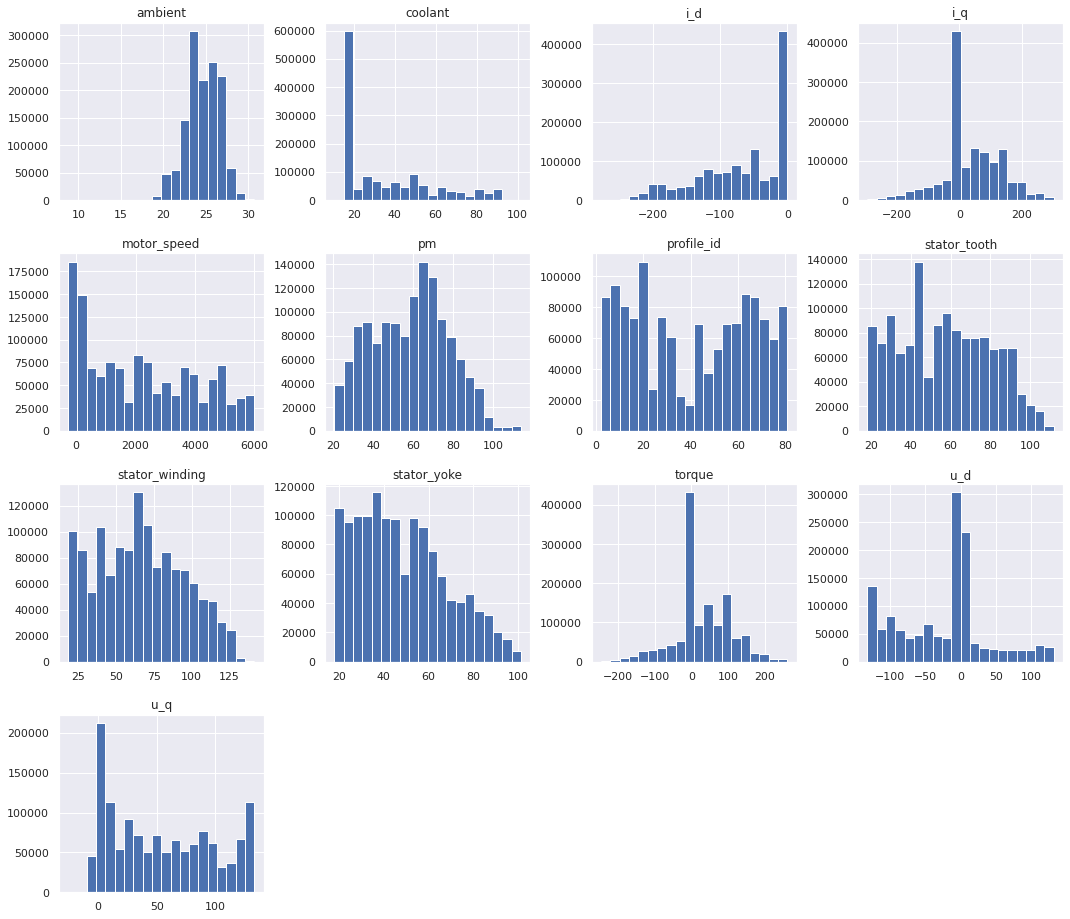

In [12]:
pmsm_data.hist(bins=20, figsize=(18,16))

<a id=section6.2.></a>
### 6.2. Pre - Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [13]:
!pip install pandas==0.25                 # You need to install pandas version 0.25 for pandas profiling or it might give some error while profiling

In [14]:
profile = pandas_profiling.ProfileReport(pmsm_data)
profile.to_file(outputfile="pmsm_before_preprocessing.html")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as titanic_before_preprocessing.html. Take a look at the file and see what useful insight you can develop from it.
Now we will process our data to better understand it.


**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables	13
- Number of observations	1330816
- Total Missing (%)	0.0%
- Total size in memory	132.0 MiB
- Average record size in memory	104.0 B

**Variables types**:
- Numeric 10
- Categorical	0
- Boolean	0
- Date	0
- Text (Unique)	0
- Rejected	3
- Unsupported	0


* stator_tooth is highly correlated with stator_winding (ρ = 0.97013).
* stator_yoke is highly correlated with stator_tooth (ρ = 0.95311).
* torque is highly correlated with i_q (ρ = 0.99646).

**Key Notes**

* Minimum value of voltage component along q axis (u_q) is -25.291 V and maximum value is 133.04.
* Minimum value of voltage component along d axis (u_d) is -131.53 V and maximum value is 131.47.
* Maximum motor speed attained is 6000 rpm with a mean of 2202.2 rpm.
* Minimum value of current component along q axis (u_q) is -293.43 A and maximum value is 301.71 A.
* Minimum value of current component along d axis (u_d) is -278 A and maximum value is 0.051897 A.
* Minimum temperature of the permanent magnet is 20.857 deg C and maximum is 113.61 deg C.
* Minimum ambient temperature is 8.7835 deg C and maximum is 30.714 deg C.
* Minimum coolant temperature is 10.624 deg C and maximum is 101.6 deg C.


Hence, we can consider `pm`, `stator_yoke`, `stator_tooth`, `stator_winding` for analysis with respect to various `profile_id`.

<a id=section6.3.></a>
### 6.3. Pre - Processing

- Dealing with missing values<br/>

In [15]:
pmsm_data.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

**Observation**: There are `No Null values` on the dataset.

## 6.4. Post - Pandas Profiling


Since the data doesnot have null values, post profiling is not necessary.

##Exploratory Data Analysis

###7.1. Which parameters are highly correlated and negatively correlated with each other?


Text(0.5, 1.0, 'Heat Map')

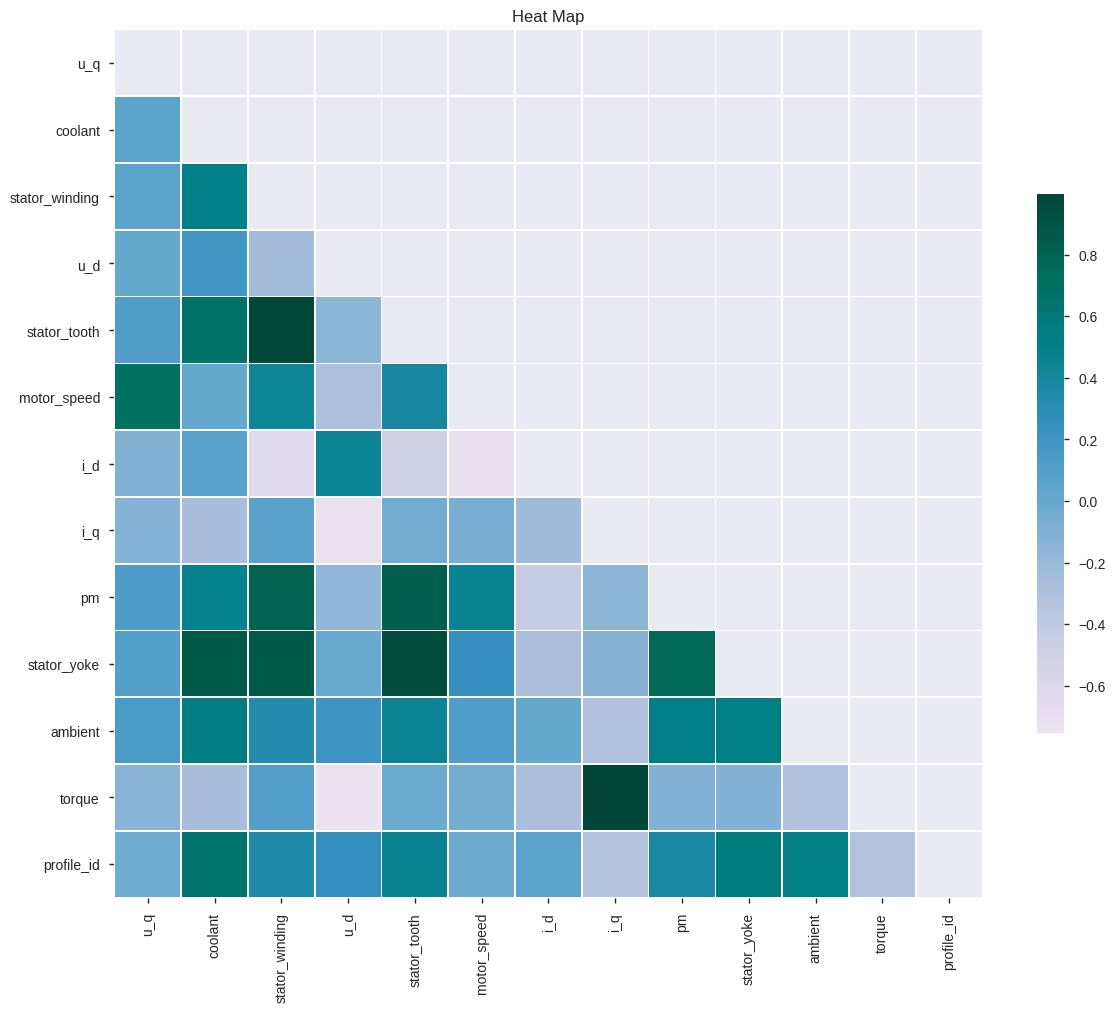

In [16]:
corr = pmsm_data.corr()    
mask = np.zeros_like(corr, dtype=np.bool)  # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = "PuBuGn"  # Generate a custom diverging colormap

plt.figure(figsize=(14,14))
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Heat Map")

**Observations**:

From the Heat Map plotted above:
* High linear correlation between `i_q` and `torque` is observed.
* High Correlation between `stator tooth` and `stator winding` is observed.
* High Correlation between `stator yoke` and `stator tooth` is observed from the profile report. 

* Negative Linear correlation is observed between `u_d` and `i_q`.
* Negative Linear correlation is observed between `u_d` and `torque`.
* Negative Linear correlation is observed between `i_d` and `stator winding`.



###7.2. Which `profile id` varies maximum and which one varies minimum for temperature rise for various parameters?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'profile_id vs count')

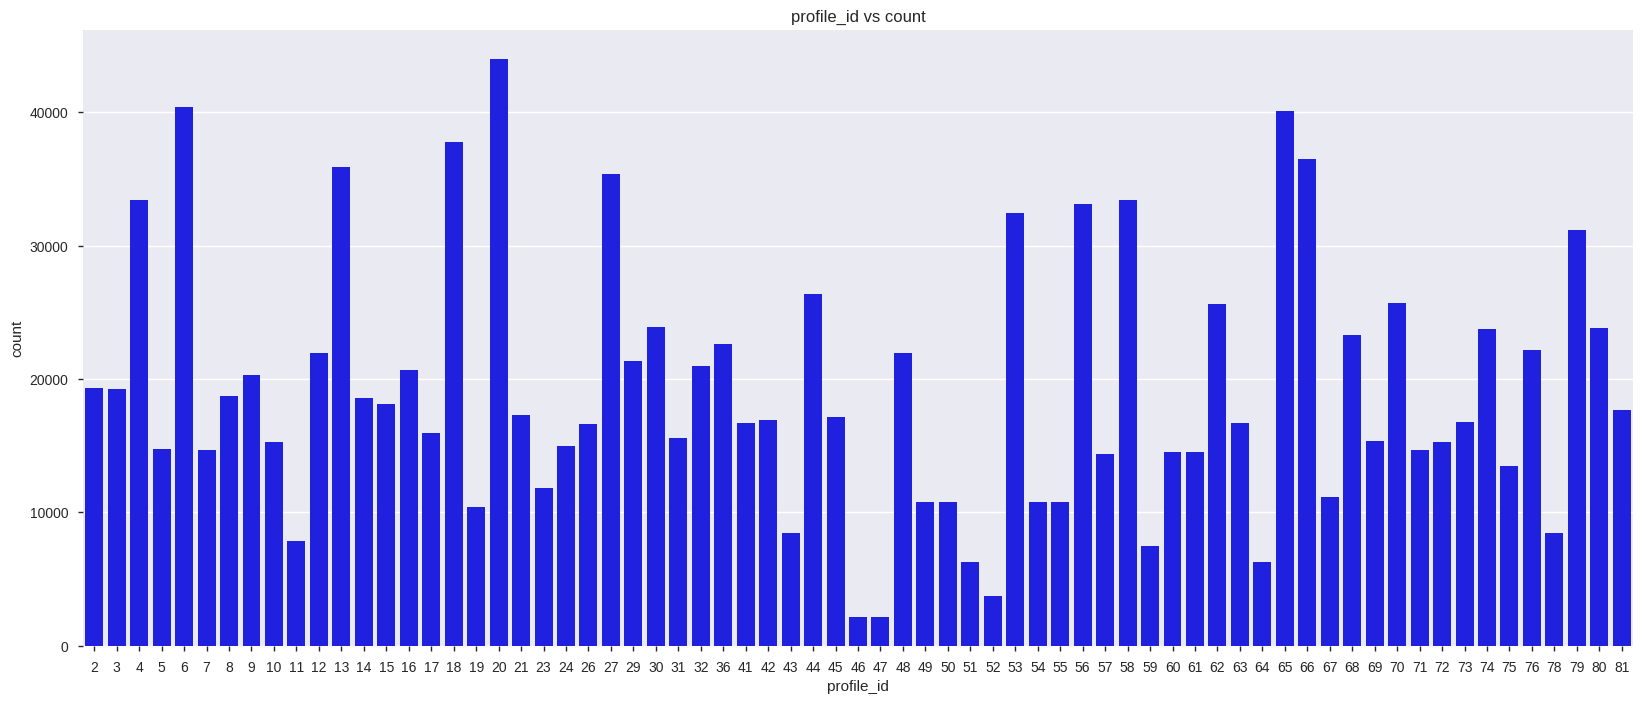

In [17]:
plt.figure(figsize=(20,8));
sns.countplot(pmsm_data['profile_id'], color = 'blue')
plt.title("profile_id vs count")

**Observations**:
* `profile_id` 20 observes maximum variation as seen from the graph above.
* `profile_id` 46 and 47 observe minimum variation.

###7.3. Which `profile id` has highiest `pm` temperature?

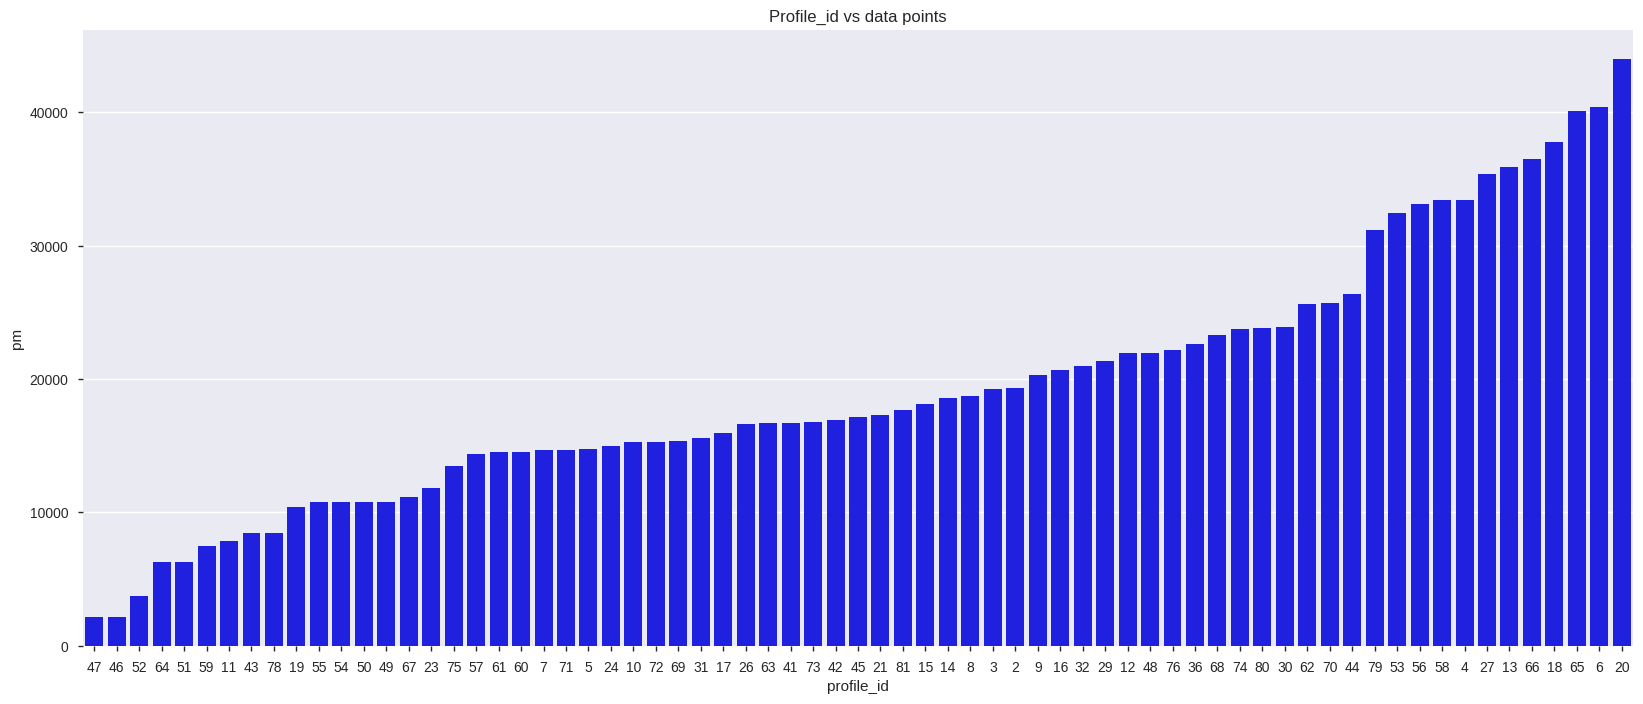

In [18]:
plt.figure(figsize=(20,8));

sns.barplot(x=pmsm_data.groupby('profile_id').agg('count').sort_values(by='pm').index,
            y=pmsm_data.groupby('profile_id').agg('count').sort_values(by='pm')['pm'],
            order=pmsm_data.groupby('profile_id').agg('count').sort_values(by='pm').index,
           orient='v',color='blue');

plt.title('Profile_id vs data points');

**Observations**:
* The maximum `pm` is found for the `profile_id` 20.


### 7.4. Which component of stator (from `stator_yoke`, `stator winding`, `stator tooth`) observes highiest variations for `profile_id` 20 (highiest varying `profile_id`)?

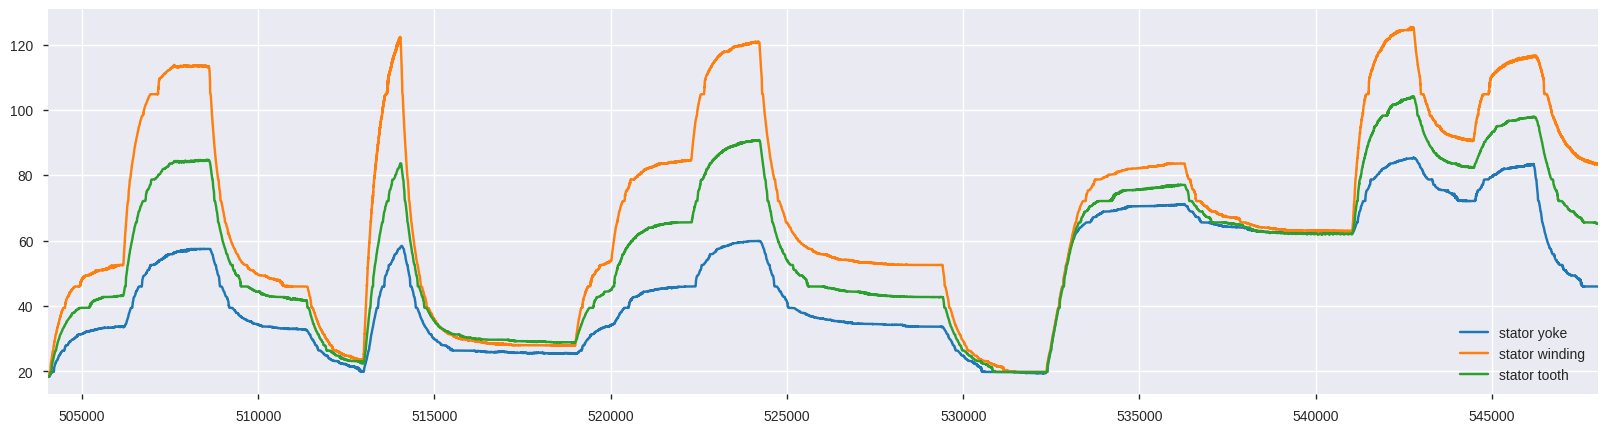

In [19]:
plt.figure(figsize=(20,5))
pmsm_data[pmsm_data['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
pmsm_data[pmsm_data['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
pmsm_data[pmsm_data['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
plt.legend()

**Observations**:
It can be observed that the graph obtained for `stator_winding`,`stator_tooth`,`stator_yoke` are similar with `stator_winding` observing maximum changes in magnitude for the highiest `profile_id` 20.

##**8. Conclusion**
- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __pre-proceesing__ helps in dealing with _missing_ values and irregualities present in the data. However, in this dataset, there were no missing values. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _stator_winding, stator_yoke, stator_tooth, pm,and profile_id_ on the temperature.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which temperature is highly positively and negatively correlated with.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict motor speed and torque of test dataset. 

###Linear Regression for `motor_speed` and `torque`

####We are just going to consider the columns `motor_speed` and `torque` for linear regression

$(motor_Speed)_i = (torque)_i  \cdot \theta_1 + \theta_0$

In [20]:
unitemprise = pmsm_data[['motor_speed' , 'torque']]
unitemprise.head()

,motor_speed,torque
0,0.002866,0.187101
1,0.000257,0.245417
2,0.002355,0.176615
3,0.006105,0.238303
4,0.003133,0.208197


In [21]:
unitemprise.to_csv('univariate_pmsm_temperature_rise.csv')

In [22]:
ls

measures_v2.csv                pmsm_before_preprocessing.html
pmsm_after_preprocessing.html  univariate_pmsm_temperature_rise.csv


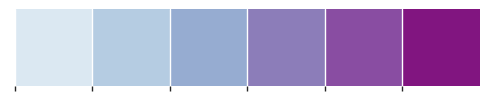

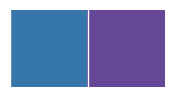

In [23]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Purple to Orange colors
pal = sns.color_palette('BuPu', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#3776ab', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [24]:
unitemprise.columns

Index(['motor_speed', 'torque'], dtype='object')

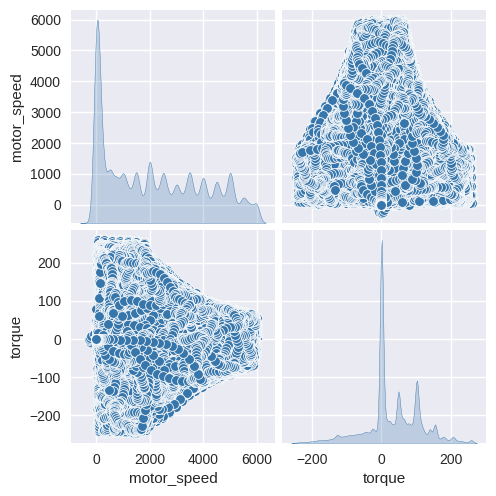

In [25]:
sns.pairplot(unitemprise,
             x_vars = ['motor_speed' , 'torque'],
             y_vars =  ['motor_speed', 'torque'],
       diag_kind='kde'
             )

In [26]:
trainDataset = unitemprise.sample(frac=0.8, random_state=0) 
testDataset = unitemprise.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

         motor_speed        torque
372073   4749.964355  7.486735e+01
766578      0.057160 -2.614878e-06
1319224     0.001482  5.436636e-14
643478   5112.368164  6.631759e+01
552128   3999.963135  9.412620e+01
    motor_speed     torque
3      0.006105   0.238303
4      0.003133   0.208197
11    -0.004142   1.031785
16    -0.001452   1.096611
26   333.672150  10.858562


In [27]:
print(trainDataset.shape)
print(testDataset.shape)

(1064653, 2)
(266163, 2)


In [28]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

         motor_speed        torque
372073   4749.964355  7.486735e+01
766578      0.057160 -2.614878e-06
1319224     0.001482  5.436636e-14
643478   5112.368164  6.631759e+01
552128   3999.963135  9.412620e+01
    motor_speed     torque
3      0.006105   0.238303
4      0.003133   0.208197
11    -0.004142   1.031785
16    -0.001452   1.096611
26   333.672150  10.858562


In [29]:
trainLabels = trainFeatures.pop('motor_speed')
testLabels = testFeatures.pop('motor_speed')

print(trainLabels.head())
print(testLabels.head())

372073     4749.964355
766578        0.057160
1319224       0.001482
643478     5112.368164
552128     3999.963135
Name: motor_speed, dtype: float64
3       0.006105
4       0.003133
11     -0.004142
16     -0.001452
26    333.672150
Name: motor_speed, dtype: float64


In [30]:
print(trainFeatures.head())
print(testFeatures.head())

               torque
372073   7.486735e+01
766578  -2.614878e-06
1319224  5.436636e-14
643478   6.631759e+01
552128   9.412620e+01
       torque
3    0.238303
4    0.208197
11   1.031785
16   1.096611
26  10.858562


In [31]:
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [32]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [33]:
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = tf.keras.optimizers.Adam(0.001), 
   
    metrics = ['mae', 'mse'] 
)

In [35]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
33271/33271 [==============================] - 45s 1ms/step - loss: 2086.0981 - mae: 2086.0981 - mse: 7576016.5000 - val_loss: 2077.0972 - val_mae: 2077.0972 - val_mse: 7509403.0000
Epoch 2/500
33271/33271 [==============================] - 40s 1ms/step - loss: 2070.2144 - mae: 2070.2144 - mse: 7456947.0000 - val_loss: 2061.1997 - val_mae: 2061.1997 - val_mse: 7391847.5000
Epoch 3/500
33271/33271 [==============================] - 44s 1ms/step - loss: 2055.1924 - mae: 2055.1924 - mse: 7341787.5000 - val_loss: 2047.2390 - val_mae: 2047.2390 - val_mse: 7279753.5000
Epoch 4/500
33271/33271 [==============================] - 44s 1ms/step - loss: 2041.3187 - mae: 2041.3187 - mse: 7231276.5000 - val_loss: 2033.4802 - val_mae: 2033.4802 - val_mse: 7171945.0000
Epoch 5/500
33271/33271 [==============================] - 44s 1ms/step - loss: 2027.6968 - mae: 2027.6968 - mse: 7123301.5000 - val_loss: 2019.9159 - val_mae: 2019.9159 - val_mse: 7063653.0000
Epoch 6/500
33271/33271 [=====